# Д/З 1

## Студеникина Мария

In [1]:
# Импорт библиотек для проведения расчетов
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Подключаем библиотеку, чтобы убрать варнинги и сделать чище выводы
import warnings
warnings.filterwarnings('ignore')

/Users/manya/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Загружаем данные
data = pd.read_csv('dataset_binary_classification.csv', sep = ';', names = ['A', 'B', 'C', 'D', '0/1'])
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values
# Пример данных
data

,A,B,C,D,0/1
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
# Нормализация переменных
X = (X - X.min())/(X.max() - X.min())
y = (y - y.min())/(y.max() - y.min())

X = torch.tensor(X).to(torch.float32)
y = torch.tensor(y).to(torch.float32)

В первых двух строках кода, переменные X и y нормализуются до значения между 0 и 1. Число X вычитается из минимального значения X и делится на разность между максимальным и минимальным значениями X. Аналогичные операции выполняются и для y.

В третьей и четвертой строках кода, переменные X и y преобразуются в объекты tensor, который используется в библиотеке torch для работы с данными. Тип данных tensor устанавливается как float32.

In [5]:
# Разделение на выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=42)

С помощью функции train_test_split разделяем данные на тренировочную и валидационнуб выборки (70:30)

In [20]:
# Построение персептрона
class MLP(nn.Module):
    def __init__(self, input_size, size):
        super(MLP, self).__init__()
        self.mlp1 = nn.Linear(input_size, size,)
        self.mlp2 = nn.Linear(size, size)
        self.mlp3 = nn.Linear(size, 1)
    
    def forward(self, x):
        x = self.mlp1(x)
        x = nn.Sigmoid()(x)
        x = self.mlp2(x)
        x = nn.Sigmoid()(x)
        x = self.mlp3(x)
        x = nn.Sigmoid()(x)
        return x

Класс MLP является производным классом от nn.Module, который является базовым классом для всех модулей нейронной сети в PyTorch. Это означает, что MLP будет наследовать функциональность и методы класса nn.Module.

Функция __init__ (конструктор) класса MLP принимает два аргумента: input_size (размер входа) и size (размер скрытого слоя).

- super(MLP, self).__init__() вызывает конструктор базового класса nn.Module, чтобы выполнить необходимые инициализации.
- self.mlp1 = nn.Linear(input_size, size) создает линейный слой (nn.Linear) с input_size входом и size выходами
- self.mlp2 = nn.Linear(size, 1) создает линейный слой (nn.Linear) с input_size входом и 1 выходом

Определяется структура многослойного перцептрона (MLP) с  линейными слоями и активационной функцией ReLU. Первый линейный слой принимает вход размером 1 и имеет input_size выходов. Второй линейный слой принимает input_size входов и имеет size выходов. Третий линейный слой принимает size входов и имеет один выход. Активационная функция ReLU используется для нелинейного преобразования выходов каждого слоя.

Метод forward в классе MLP определяет прямой проход (forward pass) через многослойный перцептрон. Он принимает входные данные x и выполняет последовательное применение линейных слоев и активационной функции для получения выхода.

- self.mlp1(x) применяет первый линейный слой к входным данным x, возвращая результат.
- self.mlp1(x) применяет второй линейный слой к x, возвращая результат.

То есть, весь метод forward представляет собой последовательное применение линейных слоев и функции Sigmoid() для вычисления выхода многослойного перцептрона.

In [7]:
def funk(s_1, s_2, s_3, s_4):
    
    mlp = MLP(s_1, s_2)
    
    optimazer = torch.optim.SGD(mlp.parameters(), lr = 0.01)
    
    # Объединение в массив для дальнейшего перемешивания данных для улучшения точности обучения
    X_y_train = torch.cat((X_train,y_train), 1)
    
    # создание списков для записи переменных для построения графиков
    num_epoch = []
    Err_train = []
    Err_val = []

    # задание количества эпох
    max_epoches = s_3

    for epoch in np.arange(max_epoches):
        
        # перемешиваем данные каждую эпоху для лучшей точности
        X_y_train_mix = X_y_train[torch.randperm(X_y_train.size()[0])]

        # разделяем на x и y
        x_1 = X_y_train_mix[:,:-1]
        y_1 = X_y_train_mix[:,-1:]

        # прогнозируем следующие значения
        y_prog = mlp(x_1)
        
        # считаем ошибку и добавляем полученное значение в список
        loss = nn.functional.binary_cross_entropy(y_prog, y_1)
        Err_train.append(loss.item())
        
        optimazer.zero_grad()
        loss.backward()
        optimazer.step()

        if (epoch % s_4 == 0):
            y_val_2 = mlp(X_val)
            loss_val = nn.functional.binary_cross_entropy(y_val_2, y_val)
            num_epoch.append(epoch)
            Err_val.append(loss_val .item())
            
            # вычисления процента обучения выборки
            current = 0
            for i in np.arange(X_val.size()[0]):
                if(abs(y_val[i] - torch.round(y_val_2[i])) < 10 ** (-9)):
                    current += 1
            accuracy = current/X_val.size()[0]
            print('Epoch № {}:  Error = {},  Accuracy = {}'.format(epoch, loss_val, accuracy))
    
    
    # график 1
    iter = np.arange(max_epoches)
    fig, ax_1 = plt.subplots()
    ax_1.plot(iter, Err_train)
    ax_1.set(xlabel = 'Номер итерации', ylabel = 'Ошибка тестовой выборки')
    
    # график 2
    fig, ax_2 = plt.subplots()
    ax_2.plot(num_epoch, Err_val)
    ax_2.set(xlabel = 'Номер эпохи', ylabel = 'Ошибка валидационной выборки')
    plt.show
    

# Вариант 1

Двухслойный персептрон
MLP(4, 512)

Колличество эпох = 10000

Epoch № 0:  Error = 0.6890445947647095,  Accuracy = 0.5558252427184466
Epoch № 1000:  Error = 0.6368432641029358,  Accuracy = 0.6601941747572816
Epoch № 2000:  Error = 0.6003211736679077,  Accuracy = 0.6674757281553398
Epoch № 3000:  Error = 0.571182370185852,  Accuracy = 0.6796116504854369
Epoch № 4000:  Error = 0.5460212826728821,  Accuracy = 0.7111650485436893
Epoch № 5000:  Error = 0.5230796337127686,  Accuracy = 0.75
Epoch № 6000:  Error = 0.5014248490333557,  Accuracy = 0.7597087378640777
Epoch № 7000:  Error = 0.48056456446647644,  Accuracy = 0.7839805825242718
Epoch № 8000:  Error = 0.4602530896663666,  Accuracy = 0.8276699029126213
Epoch № 9000:  Error = 0.4403880536556244,  Accuracy = 0.8446601941747572


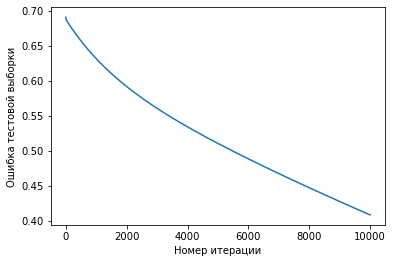

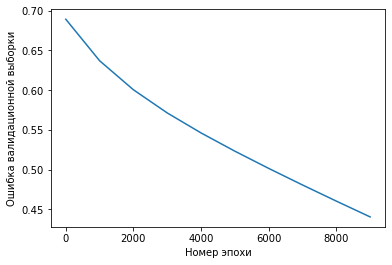

In [8]:
# применяем функцияю и задаем количетво нейтронов в слоях (вход и выход) количество эпох и с какой частотой их выводить
z = funk(4, 512, 10000, 1000)

## Краткий вывод:
Error большая, Accuracy высокая.

# Вариант 2

Двухслойный персептрон
MLP(4, 2048)

Колличество эпох = 10000

Epoch № 0:  Error = 0.6958074569702148,  Accuracy = 0.5558252427184466
Epoch № 1000:  Error = 0.5459161400794983,  Accuracy = 0.7038834951456311
Epoch № 2000:  Error = 0.47668102383613586,  Accuracy = 0.8058252427184466
Epoch № 3000:  Error = 0.42443785071372986,  Accuracy = 0.8519417475728155
Epoch № 4000:  Error = 0.38190165162086487,  Accuracy = 0.8883495145631068
Epoch № 5000:  Error = 0.3464365005493164,  Accuracy = 0.9150485436893204
Epoch № 6000:  Error = 0.3164413273334503,  Accuracy = 0.9368932038834952
Epoch № 7000:  Error = 0.2907923460006714,  Accuracy = 0.9441747572815534
Epoch № 8000:  Error = 0.26866236329078674,  Accuracy = 0.9563106796116505
Epoch № 9000:  Error = 0.24942435324192047,  Accuracy = 0.9635922330097088


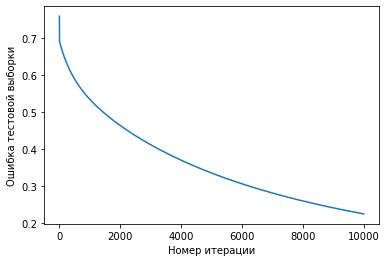

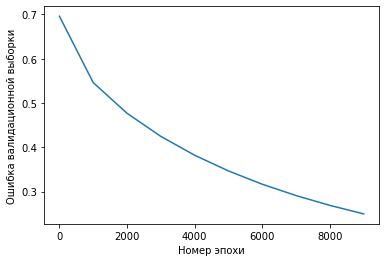

In [9]:
# применяем функцияю и задаем количетво нейтронов в слоях (вход и выход) количество эпох и с какой частотой их выводить
z_2 = funk(4, 2048, 10000, 1000)

## Краткий вывод:
Если сравнивать вариант 1 и вариант 2, то можно заметить, что Error стала намного меньше, а Accuracy увеличилась. Второй вариант лучше.

# Вариант 3

Двухслойный персептрон
MLP(4, 2048)

Колличество эпох = 1000

Epoch № 0:  Error = 0.6862704753875732,  Accuracy = 0.5558252427184466
Epoch № 100:  Error = 0.6589629054069519,  Accuracy = 0.5849514563106796
Epoch № 200:  Error = 0.6379634737968445,  Accuracy = 0.6601941747572816
Epoch № 300:  Error = 0.6200359463691711,  Accuracy = 0.6601941747572816
Epoch № 400:  Error = 0.604488730430603,  Accuracy = 0.6674757281553398
Epoch № 500:  Error = 0.5907946228981018,  Accuracy = 0.6820388349514563
Epoch № 600:  Error = 0.578554630279541,  Accuracy = 0.6771844660194175
Epoch № 700:  Error = 0.5674675703048706,  Accuracy = 0.6868932038834952
Epoch № 800:  Error = 0.5573054552078247,  Accuracy = 0.6941747572815534
Epoch № 900:  Error = 0.5478945374488831,  Accuracy = 0.7087378640776699


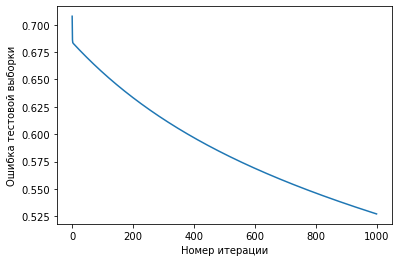

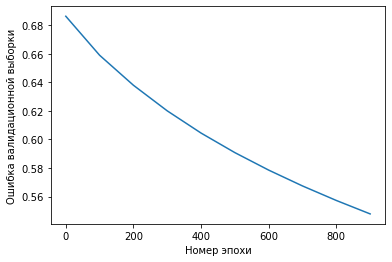

In [10]:
# применяем функцияю и задаем количетво нейтронов в слоях (вход и выход) количество эпох и с какой частотой их выводить
z_3 = funk(4, 2048, 1000, 100)

## Краткий вывод:
Если сравнивать вариант 2 и вариант 3, то можно заметить, что Error стала намного больше, а Accuracy уменьшилась. Второй вариант лучше.

# Вариант 4

Трехслойный персептрон
MLP(4, 512)

Колличество эпох = 10000

Epoch № 0:  Error = 0.6992334723472595,  Accuracy = 0.4441747572815534
Epoch № 1000:  Error = 0.6839654445648193,  Accuracy = 0.5558252427184466
Epoch № 2000:  Error = 0.6807999014854431,  Accuracy = 0.5558252427184466
Epoch № 3000:  Error = 0.6767200231552124,  Accuracy = 0.5558252427184466
Epoch № 4000:  Error = 0.6711703538894653,  Accuracy = 0.5558252427184466
Epoch № 5000:  Error = 0.6635134220123291,  Accuracy = 0.5776699029126213
Epoch № 6000:  Error = 0.6530866026878357,  Accuracy = 0.633495145631068
Epoch № 7000:  Error = 0.639356791973114,  Accuracy = 0.6601941747572816
Epoch № 8000:  Error = 0.6221652626991272,  Accuracy = 0.6553398058252428
Epoch № 9000:  Error = 0.6019193530082703,  Accuracy = 0.6529126213592233


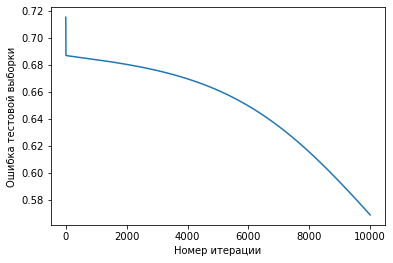

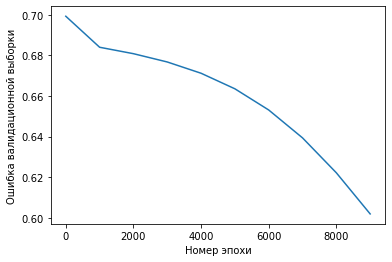

In [12]:
# применяем функцияю и задаем количетво нейтронов в слоях (вход и выход) количество эпох и с какой частотой их выводить
z_4 = funk(4, 512, 10000, 1000)

## Краткий вывод:
Если сравнивать с предыдущими вариантами, то можно заметить, что второй вариант лучше.

# Вариант 5

Трехслойный персептрон
MLP(4, 2048)

Колличество эпох = 10000

Epoch № 0:  Error = 0.6868457794189453,  Accuracy = 0.5558252427184466
Epoch № 1000:  Error = 0.6748900413513184,  Accuracy = 0.5558252427184466
Epoch № 2000:  Error = 0.6563910245895386,  Accuracy = 0.6140776699029126
Epoch № 3000:  Error = 0.6257156729698181,  Accuracy = 0.6529126213592233
Epoch № 4000:  Error = 0.583533763885498,  Accuracy = 0.6723300970873787
Epoch № 5000:  Error = 0.5369144082069397,  Accuracy = 0.7087378640776699
Epoch № 6000:  Error = 0.4891504943370819,  Accuracy = 0.7548543689320388
Epoch № 7000:  Error = 0.4387318789958954,  Accuracy = 0.8203883495145631
Epoch № 8000:  Error = 0.3854418992996216,  Accuracy = 0.8592233009708737
Epoch № 9000:  Error = 0.3320173919200897,  Accuracy = 0.8980582524271845


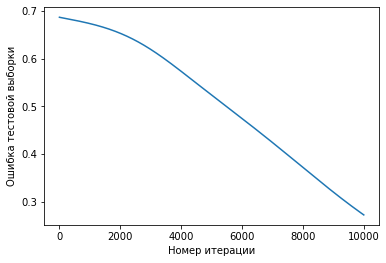

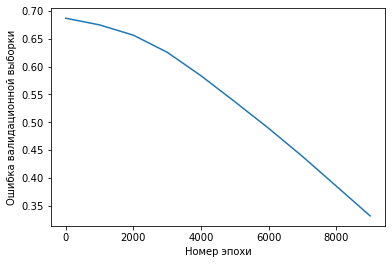

In [14]:
# применяем функцияю и задаем количетво нейтронов в слоях (вход и выход) количество эпох и с какой частотой их выводить
z_5 = funk(4, 2048, 10000, 1000)

## Краткий вывод:
Если сравнивать с предыдущими вариантами, то можно заметить, что второй вариант лучше.

# Вариант 6

Трехслойный персептрон
MLP(4, 2048)

Колличество эпох = 1000

Epoch № 0:  Error = 0.6873395442962646,  Accuracy = 0.5558252427184466
Epoch № 100:  Error = 0.6860463619232178,  Accuracy = 0.5558252427184466
Epoch № 200:  Error = 0.6850263476371765,  Accuracy = 0.5558252427184466
Epoch № 300:  Error = 0.6840013861656189,  Accuracy = 0.5558252427184466
Epoch № 400:  Error = 0.6829647421836853,  Accuracy = 0.5558252427184466
Epoch № 500:  Error = 0.6819100975990295,  Accuracy = 0.5558252427184466
Epoch № 600:  Error = 0.6808313131332397,  Accuracy = 0.5558252427184466
Epoch № 700:  Error = 0.679722249507904,  Accuracy = 0.5558252427184466
Epoch № 800:  Error = 0.6785765886306763,  Accuracy = 0.5558252427184466
Epoch № 900:  Error = 0.677388608455658,  Accuracy = 0.5558252427184466


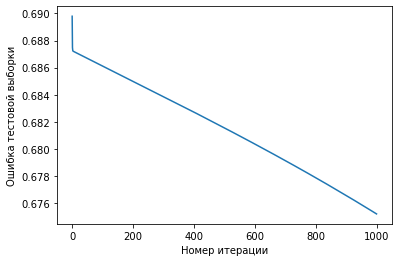

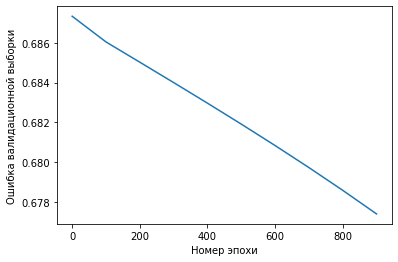

In [21]:
# применяем функцияю и задаем количетво нейтронов в слоях (вход и выход) количество эпох и с какой частотой их выводить
z_6 = funk(4, 2048, 1000, 100)

## Краткий вывод:
Если сравнивать с предыдущими вариантами, то можно заметить, что второй вариант лучше.

# Вывод:

Не все модели показали хорошую способность к классификации данных.

Качество классификации зависит от количества слоев, нейронов в каждом слое и от количества эпох.

Для решения данной задачи лучше всего показал себя двухслойный персептрон с 4 и 2048 нейронами, кроме того, лучше использовать 10000 эпох.

Процесс обучения моделей Персептрона может быть долгим и трудоемким, особенно для сложных сетей, и требует подбора оптимальных параметров обучения.